<h1>Aktivierungsfunktionen in neuralen Netzen</h1>

Aktivierungsfunktionen sind kleinere Funktionen, die ein Neuron hat, die einen Output generieren.

Jeder Neuron hat zu Beginn zufällig initialisierte Weights (Gewichte). Das Ziel ist es, diese Weights so anzupassen, dass der Fehler, der am Ende berechnet wird (Loss, total Error) minimal wird. Dieser Vorgang ist das Training.

<i>Abb1</i>: Eingabe der Features in ein einziges Neuron. Jedes Neuron hat 2 Komponente.

<img src="./img/nn_1.PNG" width=600 hight=400>

Die Funktion wandeln das Ergebnis der Summe in eine andere Zahl um, wie z. B. die Zahl 50 in 0,5.

Mit einer Sigmoidfunktion am Ende des Netzes können die Zahlen in den Bereich von 0 bis 1 umgewandelt werden. Dadurch eine es viel einfacher eine Entscheidung zu treffen, wenn alles über 0,5 als Positiv gewertet wird => Neuron ist aktiviert. 

Kleinere Zahlen sind besser für ein Netzwerk geeignet als sehr große Zahlen. 

Es gibt viele dieser Funktionen, die unterschiedliche Aufgabe haben. Eine Funktion, die linear ist, gibt den Output so weiter wie dieser angekommen ist, mit anderen Worten, genau das Ergebnis der Summe.

Die Berechnung der linearen Outputs ist weit weniger aufwendig als bei den andere Funktion, wo verschiedene mathematische Operationen ausgeführt werden müssen. Frameworks wie PyTorch, Tensorflow, usw. haben diese Algorithmen effizient passend zur Hardware implementiert, oder nutzen speziele Libraries wo dies schon erledigt wurde. Die Berechnungen müssen sehr effizient laufen, da es sehr viele Neuronen und Layers in einem Netzwerk gibt. Eine langsame Berechnung verlängert das Training.  
In C++ könnte man z. B. Intrinsics nutzen, um effizient die Vektorisierung der CPU zu verwenden.

Daher ist es wichtig zu verstehen, welche Auswirkungen verschiedenen Funktionen haben, und welche Funktionen wo besser eingesetzt werden sollten. Ohne die Aktivierungsfunktion kann die Gleichung als einfache lineare Funktion dargestellt werden. Komplexere Probleme können aber nicht einfach linear gelöst werden.

<i>Abb2</i>: Einfaches neurales Netz.

<img src="./img/nn_3.PNG" width=600 hight=400>

Die Weights eines Model beeinflussen wie stark sich ein kommender Wert eines Neurons oder Inputs auf das Ergebnis der Summe auswirkt. Mit der Veränderung der Gewichte ändert sich auch das Ergebnis, und damit hoffentlich der Gesamtfehler am Ende, der minimiert werden soll.

Verschiedene Funktionen haben auch unterschiedlichen Umgang mit Outlier. 

<i>Abb3</i>: Grobes Beispiel wie eine Funktion Datenpunkte abdeckt.

<img src="./img/nn_2.PNG" width=600 hight=400>

Ein anderes Beispiel wäre, wenn der Output eines Netzes fünf Neuronen für die Klassifizierung hat, kann eine falsch angewendete Aktivierungsfunktion dafür sorgen, dass der Output genau 1 oder 0 ist. 

Bei einer Klassifizierung wäre es besser einen Bereich zwischen 0 und 1 Anzugeben (wie 0,3, 0,567, oder 0,81), wo der höchste Wert z. B. 0,91 als positiv gewertet wird. 

<i>Abb4</i>: Auswahl der falschen Aktivierungsfunktion sorgt dafür, das der Output entweder 1 oder 0 ist.

<img src="./img/nn_4.PNG" width=600 hight=400>

Ein andere sehr wichtiger Punkt ist: Eine ausgewählte Funktion kann bei bestimmten Eingaben ein Problem mit sich bringen. <bR>
(Es gibt viele interessante Artikel darüber)
- Vanishing-Gradient
- Exploding-Gradient

Vanishing-Gradient beschreibt das Problem, dass die Steigung einer Funktion sich bei bestimmten Eingaben nicht groß verändert. Durch eine sehr geringe Veränderung ist der Anpassungsprozess des Gradienten langsam => langsames lernen.

Je nach Framework können die Funktionen mit Parametern angepasst werden.

<h1>Code</h1>

Mit Frameworks wie Tensorflow können die verschiedenen Funktionen direkt angewendet werden.

In [17]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [49]:
# Zeichne Funktion.
def draw_plot(X, y, title:str, verc:int=0, horiz_act:bool=False, horiz:float=0.6):
    intp = interp1d(x=X, y=y, kind=2)
    x2 = np.linspace(start=X[0], stop=X[len(X)-1], num=1000)
    y2 = intp(x2)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel('y')
    plt.plot(x2, y2, color='green' )
    plt.axvline(x = verc, color = 'black', linestyle='--')

    if horiz_act:
        plt.hlines(y = horiz, color = 'black', linestyle='--', xmin=X[0], xmax=X[len(X)-1])
    
    plt.show()

<h2>Sigmoid</h2>

Sigmoid Funktion: <br>
$
f(x) = \frac{1}{1 + e^{-x} }
$

In [4]:
# Anwendung der Funktion mit Tensorflow.keras
tf.keras.activations.sigmoid(10.0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9999546>

In [10]:
# In Python Code:
def sigmoid_funk(x:float):
    return 1 / (1 + math.exp(-x))

sigmoid_funk(10.0)

0.9999546021312976

In [25]:
X = np.array(range(-10, 10))
y = [sigmoid_funk(i)  for i in x]

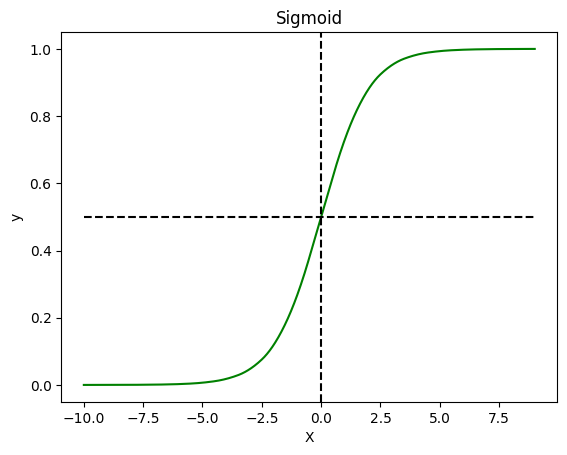

In [52]:
draw_plot(X, y, 'Sigmoid', horiz_act=True, horiz=0.5)

<h2>Hard-Sigmoid</h2>

In [53]:
# Anwendung der Funktion mit Tensorflow.keras
tf.keras.activations.hard_sigmoid(10.0)

AttributeError: 'float' object has no attribute 'dtype'

<h2>ReLU</h2>

<h1>Einsatzmöglichkeiten der Funktionen</h1>